In [0]:
from __future__ import absolute_import, print_function, division
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto

tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

tf.enable_eager_execution()
tfds.list_builders()

1.13.1


['bair_robot_pushing_small',
 'caltech101',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'coco2014',
 'colorectal_histology',
 'colorectal_histology_large',
 'cycle_gan',
 'diabetic_retinopathy_detection',
 'dsprites',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'fashion_mnist',
 'flores',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imdb_reviews',
 'kmnist',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'quickdraw_bitmap',
 'rock_paper_scissors',
 'shapes3d',
 'squad',
 'starcraft_video',
 'svhn_cropped',
 'ted_hrlr_translate',
 'ted_multi_translate',
 'tf_flowers',
 'titanic',
 'voc2007']

In [0]:
dataset, meta = tfds.load('mnist',as_supervised=True,with_info=True)
train,test = dataset['train'],dataset['test']

In [0]:
classes = [0,1,2,3,4,5,6,7,8,9]
print(meta)

numtra,numtes = meta.splits['train'].num_examples,meta.splits['test'].num_examples

print(numtra,numtes)
print(train)


tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
    redistribution_info=,
)

60000 10000
<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64

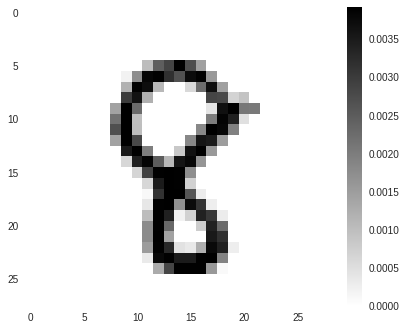

(28, 28)


In [0]:
def normalise(images,labels):
  images = tf.cast(images,tf.float32)
  images/=255
  return images,labels


train,test = train.map(normalise),test.map(normalise)

for image,label in train.take(1):
  break

image = image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.show()

print(image.shape)

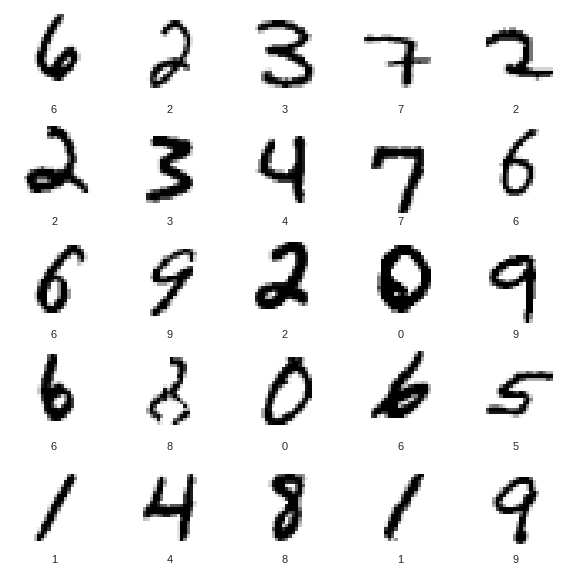

(28, 28)


In [0]:
plt.figure(figsize=(10,10))
i =0
for image,label in test.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(classes[label])
  i+=1
  
  
plt.show()
print(image.shape)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
BSIZE = 32
train = train.repeat().shuffle(numtra).batch(BSIZE)
test = test.batch(BSIZE)

model.fit(train,epochs=10,steps_per_epoch=math.ceil(numtra/BSIZE))

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.6941 - acc: 0.7682
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2238 - acc: 0.9319
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1576 - acc: 0.9518
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1187 - acc: 0.9643
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1042 - acc: 0.9677
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0900 - acc: 0.9732
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0794 - acc: 0.9759
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0706 - acc: 0.9788
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0650 - acc: 0.9802
Epoch 10/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0568 - acc: 0.9821


In [0]:
test_loss,test_accuracy = model.evaluate(test,steps=math.ceil(numtes/BSIZE))
print(test_loss,test_accuracy)

313/313 [==============================] - 3s 11ms/step - loss: 0.0648 - acc: 0.9772
0.06475654218052797 0.9772


In [0]:
for test_image,test_label in test.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predictions = model.predict(test_image)
  
print(predictions.shape)

(32, 10)


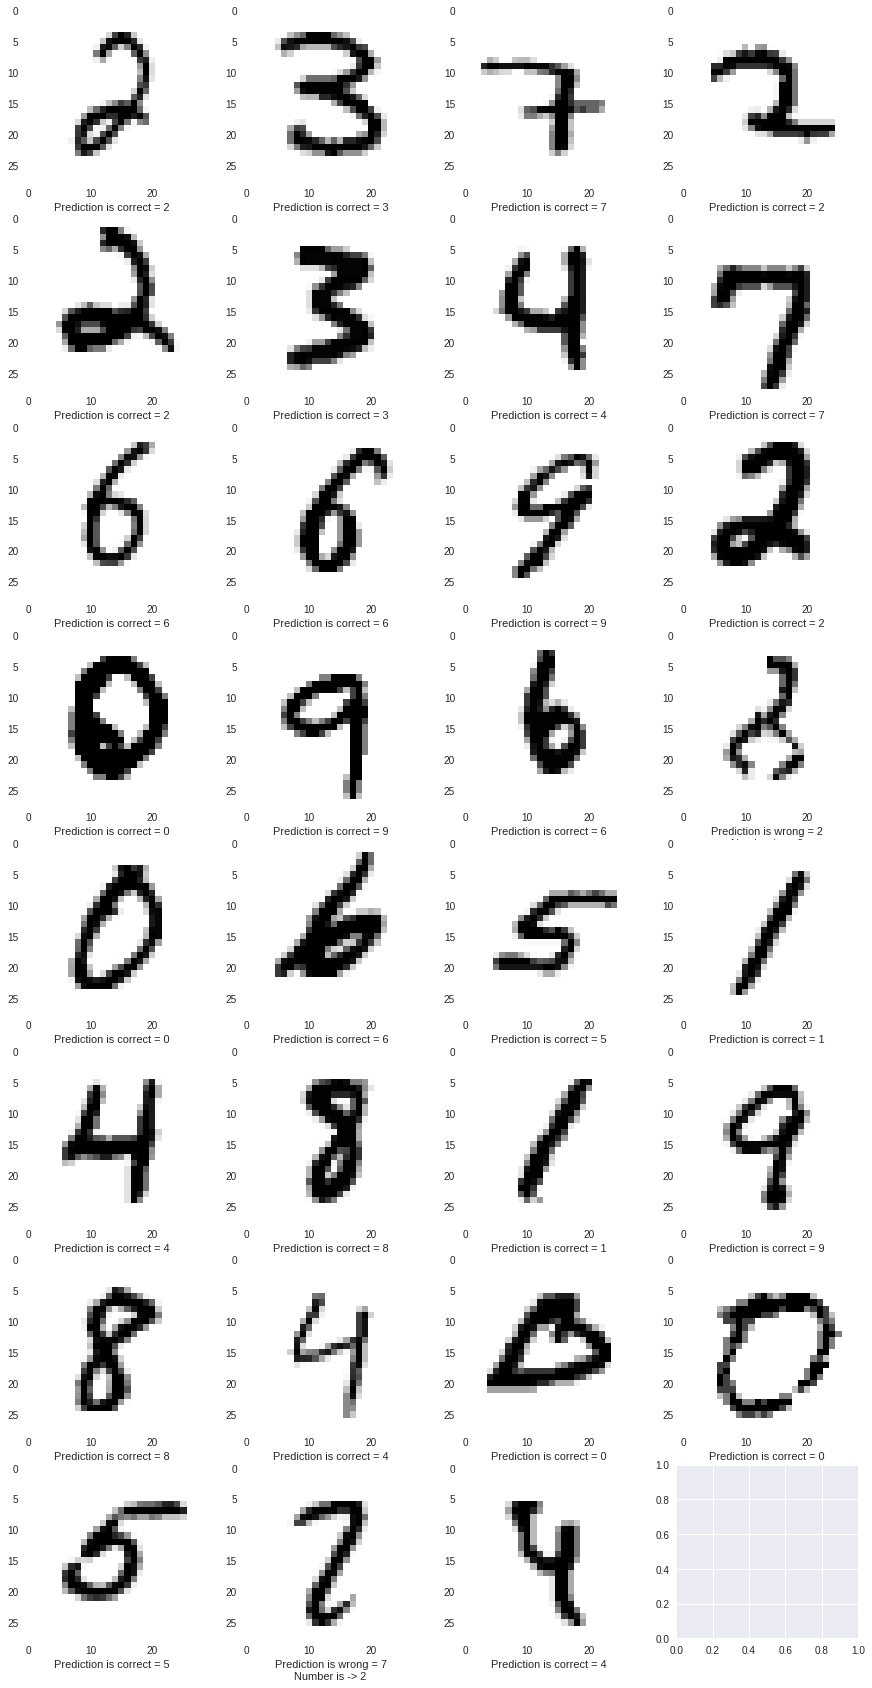

In [0]:
for img,lab  in test.take(1):
  break
k=1
plt.figure(figsize=(15,30))
for i in range(32):
  
  plt.imshow(img[i][...,0],cmap=plt.cm.binary)
  plt.grid(False)
  if classes[test_label[i]]==classes[np.argmax(predictions[i])]:
    plt.xlabel('Prediction is correct = '+str(classes[np.argmax(predictions[i])]))
  else:
    plt.xlabel('Prediction is wrong = ' +str(classes[np.argmax(predictions[i])])+'\nNumber is -> '+str(classes[test_label[i]]))
  plt.subplot(8,4,k)
  #plt.xlabel(classes[np.argmax(predictions[i])])
  #print(classes[test_label[i]])
  
  k+=1
plt.show()